In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('cosmo_graph1.csv')

# Preview the data
print(df.head())


            source           target  weight  distance
0  CASSLDSSGGNEQYF  CASSLDSSSGNTIYF   0.118         1
1  CASSLDSSGGNEQYF    CASIDSSGNTLYF   0.124         3
2  CASSLDSSGGNEQYF  CASSLVSSGANVLTF   0.151         2
3   CASSDSGEAGELFF   CASSSQGAAGELFF   0.147         3
4  CASSLELAAWETQYF  CASSVELAGTYEQYF   0.227         4


In [2]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges with attributes
for _, row in df.iterrows():
    G.add_edge(row['source'], row['target'], weight=row['weight'], distance=row['distance'])


## Clustering Methods ##

### Spectral Clustering ###

In [4]:
from sklearn.cluster import SpectralClustering
import numpy as np

# Create adjacency matrix
adj_matrix = nx.to_numpy_array(G, weight='weight')

# Apply Spectral Clustering
n_clusters = 5  # Specify the number of clusters
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed')
labels = sc.fit_predict(adj_matrix)

# Assign clusters back to nodes
clusters = {node: labels[i] for i, node in enumerate(G.nodes())}
print(clusters)


{'CASSLDSSGGNEQYF': 4, 'CASSLDSSSGNTIYF': 4, 'CASIDSSGNTLYF': 4, 'CASSLVSSGANVLTF': 4, 'CASSDSGEAGELFF': 2, 'CASSSQGAAGELFF': 2, 'CASSLELAAWETQYF': 4, 'CASSVELAGTYEQYF': 4, 'CASSSRHEGEDTEAFF': 2, 'CASSRDLGRDTQYF': 2, 'CASSLIGVSSYNEQFF': 2, 'CASSITLSSYNEQFF': 2, 'CASSLAVLSSYNEQFF': 2, 'CASSVATSGGSQQFF': 0, 'CASSQAGQGNSPLHF': 0, 'CASSLKIGEQFF': 3, 'CASSLVGGEQYF': 1, 'CASSARTGELFF': 3, 'CASSPVTGGIYGYTF': 1, 'CASSPSTGTIYGYTF': 1, 'CASSYPGGGFYEQYF': 1, 'CASSWGQGSNYGYTF': 2, 'CSANDRTSGSNYNEQFF': 2, 'CASNGQGDTEAFF': 2, 'CASSFGQSSTYGYTF': 2, 'CASSLGQGLLYGYTF': 2, 'CASSQVLVGETQYF': 4, 'CASSLGALGETQYF': 4, 'CASSVLAGDTQYF': 4, 'CASSQTQLWETQYF': 4, 'CASSWVPPGQGRTGELFF': 3, 'CASSPAGQGGYEQYF': 3, 'CASSQGPQVRGADTQYF': 2, 'CASGGQGRAEQFF': 2, 'CASSDDRGPYEQYF': 1, 'CASSYDRGPREGYTF': 1, 'CASAQIGPYEQYF': 1, 'CASRIWDGGASTDTQYF': 0, 'CSVGGSGGADTQYF': 0, 'CASSYWDRTTSGNTIYF': 0, 'CASSIGQGKSSYEQYF': 0, 'CTCSAAPDWGASAETLYF': 0, 'CASSDAGGRNTLYF': 3, 'CASSQEGGGETQYF': 3, 'CASSPGGGMNTEAFF': 3, 'CASSLVGGRHGYTF': 3,

### KMeans ###

In [ ]:
from node2vec import Node2Vec
from sklearn.cluster import KMeans

# Generate embeddings using Node2Vec
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)

# Get embeddings for each node
embeddings = {node: model.wv[node] for node in G.nodes()}

# Convert embeddings to a matrix
X = np.array([embeddings[node] for node in G.nodes()])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)

# Assign clusters back to nodes
clusters = {node: kmeans.labels_[i] for i, node in enumerate(G.nodes())}
print(clusters)


## Visualize clustering ##

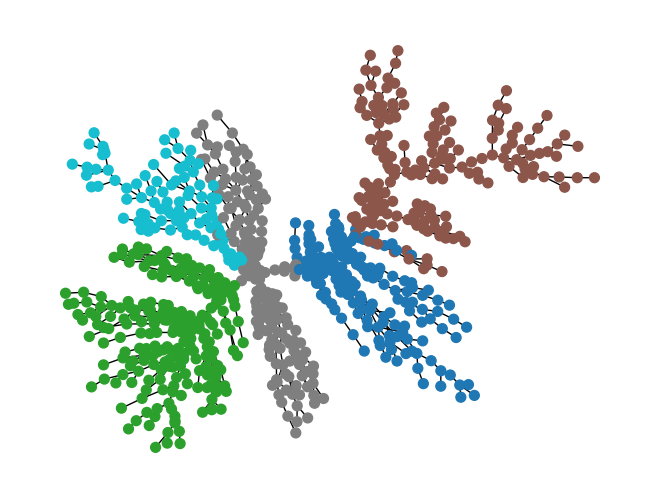

In [12]:
import matplotlib.pyplot as plt

# Color nodes based on clusters
colors = [labels[i] for i, node in enumerate(G.nodes())]

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color=colors, cmap=plt.cm.tab10, node_size=50)
plt.show()
